In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns;sns.set()

import FV3log

# Preprocessing

In [2]:
# global variables for convenience
maindir = "/Users/zhuangjw/Research/Computing/FV3/outputlog/"

var_list = ['plume0{0}'.format(i) for i in range(1,5)]

Vres_list = [20,40,80,160]
Hres_list = [48,96,192,384]

Vlabels = ['L{0}'.format(r) for r in Vres_list]
Hlabels = ['C{0}'.format(r) for r in Hres_list]

In [3]:
var_list

['plume01', 'plume02', 'plume03', 'plume04']

In [4]:
size_list = ['(1000km, 0.6km)', '(1000km, 1.2km)', 
             '(500km, 0.6km)', '(500km, 1.2km)']

In [5]:
# Extract all results!
ds = FV3log.extract_HsVs(maindir, var_list, Hres_list, Vres_list)
ds


 open: C48L20_std.log C48L40_std.log C48L80_std.log C48L160_std.log 
 open: C96L20_std.log C96L40_std.log C96L80_std.log C96L160_std.log 
 open: C192L20_std.log C192L40_std.log C192L80_std.log C192L160_std.log 
 open: C384L20_std.log C384L40_std.log C384L80_std.log C384L160_std.log 

<xarray.Dataset>
Dimensions:  (Hres: 4, Vres: 4, time: 9)
Coordinates:
  * time     (time) int64 0 1 2 3 4 5 6 7 8
  * Vres     (Vres) int64 20 40 80 160
  * Hres     (Hres) int64 48 96 192 384
Data variables:
    plume01  (Hres, Vres, time) float32 1.0 0.884535 0.541212 0.319658 ...
    plume02  (Hres, Vres, time) float32 1.0 0.953083 0.627592 0.48241 ...
    plume03  (Hres, Vres, time) float32 1.0 0.66268 0.372343 0.251123 ...
    plume04  (Hres, Vres, time) float32 1.0 0.774934 0.533533 0.388228 ...

In [6]:
ds_end = ds.isel(time=-1)
ds_end

<xarray.Dataset>
Dimensions:  (Hres: 4, Vres: 4)
Coordinates:
    time     int64 8
  * Vres     (Vres) int64 20 40 80 160
  * Hres     (Hres) int64 48 96 192 384
Data variables:
    plume01  (Hres, Vres) float32 0.093736 0.0973273 0.113596 0.117215 ...
    plume02  (Hres, Vres) float32 0.140424 0.183006 0.191963 0.195699 ...
    plume03  (Hres, Vres) float32 0.0659106 0.0833525 0.0971324 0.101795 ...
    plume04  (Hres, Vres) float32 0.119348 0.144062 0.158039 0.1606 0.120923 ...

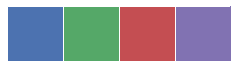

In [7]:
palette = sns.color_palette()[0:4]
sns.palplot(palette)

# trend

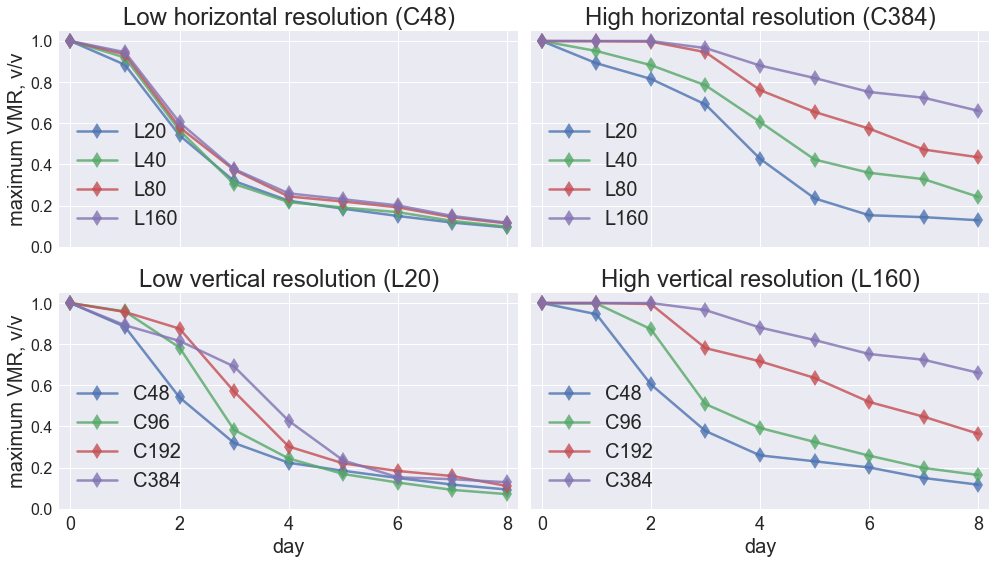

In [8]:
dr = ds['plume01'] #only look at the "standard plume"

titlesize, labelsize = [24,20]
fig, axes = plt.subplots(2,2,figsize=[14,8])

color_list = palette
marker_list = ['d','o','s','D']
alpha = 0.8
linewidth = 2.5
linestyle = '-'
markersize = 12

def set_detail(ax):
    ax.set_ylim([0,1.05]);ax.set_xlim([-0.2,8.2])
    ax.legend(fontsize=labelsize, loc=3)
    ax.xaxis.set_tick_params(labelsize=18)
    ax.yaxis.set_tick_params(labelsize=16)
    
        
for i,Hres in enumerate(Hres_list[0:4:3]):
    ax = axes[0][i]
    if Hres == 48:
        ax.set_title('Low horizontal resolution (C48)',fontsize=titlesize)
    if Hres == 384:
        ax.set_title('High horizontal resolution (C384)',fontsize=titlesize)
    
    for j,Vres in enumerate(Vres_list):
        marker = marker_list[0]; color = color_list[j]; 
        
        ax.plot(dr.sel(Hres=Hres,Vres=Vres),label='L{0}'.format(Vres),
                linestyle=linestyle,linewidth=linewidth,markersize=markersize,
                marker=marker,color=color,alpha=alpha)
    set_detail(ax)
    
    ax.set_xticklabels([], [])
    if i==0:
        ax.set_ylabel('maximum VMR, v/v',fontsize=labelsize)
    else:
        ax.set_yticklabels([], [])
        
for i,Vres in enumerate(Vres_list[0:4:3]):
    ax = axes[1][i]
    if Vres == 20:
        ax.set_title('Low vertical resolution (L20)',fontsize=titlesize)
    if Vres == 160:
        ax.set_title('High vertical resolution (L160)',fontsize=titlesize)
    
    for j,Hres in enumerate(Hres_list):
        marker = marker_list[0]; color = color_list[j]; 
        
        ax.plot(dr.sel(Hres=Hres,Vres=Vres),label='C{0}'.format(Hres),
                linestyle=linestyle,linewidth=linewidth,markersize=markersize,
                marker=marker,color=color,alpha=alpha)
    set_detail(ax)
    ax.set_xlabel('day',fontsize=labelsize)
    if i==0:
        ax.set_ylabel('maximum VMR, v/v',fontsize=labelsize)
    else:
        ax.set_yticklabels([], [])
        
    #plt.xticks(fontsize=labelsize);plt.yticks(fontsize=labelsize)
    
fig.tight_layout()
fig.savefig('plume01_trend.png',dpi=200)

# last day

## 2D contour

In [9]:
dr_end = ds_end['plume01']
dr_end 

<xarray.DataArray 'plume01' (Hres: 4, Vres: 4)>
array([[ 0.093736,  0.097327,  0.113596,  0.117215],
       [ 0.071262,  0.118098,  0.152428,  0.164323],
       [ 0.110981,  0.200145,  0.310812,  0.364484],
       [ 0.128934,  0.242495,  0.435029,  0.660734]], dtype=float32)
Coordinates:
    time     int64 8
  * Vres     (Vres) int64 20 40 80 160
  * Hres     (Hres) int64 48 96 192 384

In [10]:
dr_end.to_pandas()

Vres,20,40,80,160
Hres,,,,
48,0.093736,0.097327,0.113596,0.117215
96,0.071262,0.118098,0.152428,0.164323
192,0.110981,0.200145,0.310812,0.364484
384,0.128934,0.242495,0.435029,0.660734


In [11]:
'{:.3f}'.format(dr_end.values[0,0])

'0.094'

### pcolormesh

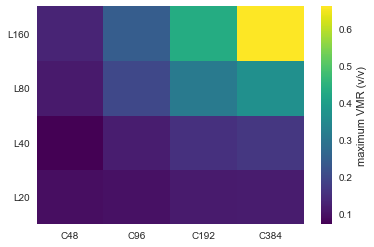

In [12]:
plt.pcolormesh(dr_end.values, 
               cmap='viridis')
plt.colorbar().set_label('maximum VMR (v/v)')

xs = ys = np.arange(4)+0.5
plt.xticks( xs , Hlabels );
plt.yticks( ys , Vlabels );

plt.savefig('heatmap.png',dpi=200)

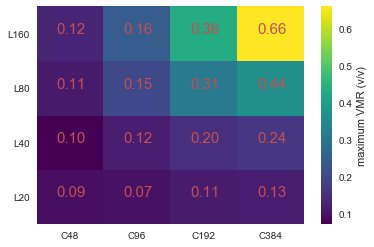

In [13]:
# overlay number

plt.pcolormesh(dr_end.values, 
               cmap='viridis')
plt.colorbar().set_label('maximum VMR (v/v)')

xs = ys = np.arange(4)+0.5
plt.xticks( xs , Hlabels );
plt.yticks( ys , Vlabels );

for i in range(4):
    for j in range(4):
        plt.text(xs[i]-0.2 ,ys[j] , 
                 '{:.2f}'.format(dr_end.values[i,j]),
                 color=palette[2], fontsize=15)
        
plt.savefig('heatmap_with_number.png',dpi=200)

### Contour fill

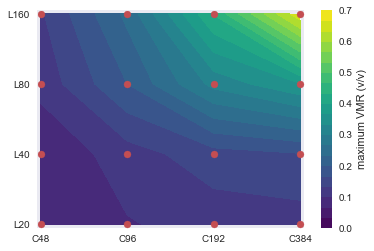

In [14]:
plt.contourf(dr_end.values, cmap='viridis', 
             levels = np.linspace(0, 0.7, 22))
plt.colorbar().set_label('maximum VMR (v/v)')

xs = ys = np.arange(4)
plt.xticks( xs, Hlabels );
plt.yticks( ys, Vlabels );

xxs, yys = np.meshgrid(xs,ys)
plt.scatter(xxs, yys, color=palette[2])
plt.xlim([-0.05,3.05]);plt.ylim([-0.05,3.05])

plt.savefig('contour.png',dpi=200)

In [15]:
dx_list = 200/np.array([1,2,4,8])
dz_list = 0.6/np.array([1,2,4,8])
dx_list

array([ 200.,  100.,   50.,   25.])

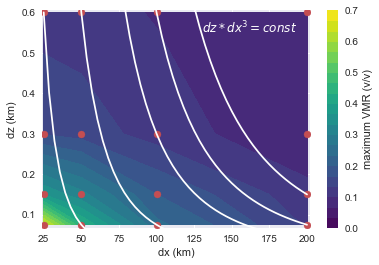

In [16]:
plt.contourf(dx_list, dz_list, dr_end.values,
             levels = np.linspace(0, 0.7, 22),
             cmap='viridis')
plt.colorbar().set_label('maximum VMR (v/v)')
plt.xlabel('dx (km)');plt.ylabel('dz (km)')

xxs, yys = np.meshgrid(dx_list,dz_list)
plt.scatter(xxs, yys, color=palette[2])
plt.xlim([24,202]);plt.ylim([0.6/8*0.9, 0.605])

if 0:
    # add dx/dz constant line
    dx = np.arange(0,200)
    opts = 200/0.6 # optimal scaling
    
    plt.plot(dx, dx/opts, color='w')
    plt.plot(dx, dx/opts/2, color='w')
    plt.plot(dx, dx/opts/4, color='w')
    plt.plot(dx, dx/opts*2, color='w')
    plt.plot(dx, dx/opts*4, color='w')
    
    plt.text(150,0.56,'dx/dz=300', color='w')
    plt.text(100,0.58,'dx/dz=150', color='w')
    plt.text(50,0.58,'dx/dz=75', color='w')
    plt.text(150,0.3,'dx/dz=600', color='w')
    plt.text(150,0.15,'dx/dz=1200', color='w')
    
if 1:
    # computational constaint
    dxx = np.linspace(25,200)
    dzz = 0.3e6/dxx**3
    text = '$dz*dx^3=const$'
    #dzz = 0.3e4/dxx**2
    #text = '$dz*dx^2=const$'
    
    plt.plot(dxx,dzz,c='w')
    for level in [1/32,1/4,2,4]:
        plt.plot(dxx,level*dzz,c='w')
    plt.text(130,0.55,text,color='w')

#plt.xscale('log')
#plt.yscale('log')
    
#plt.savefig('contour_comp_constaint.png',dpi=200)
#plt.savefig('contour_const_scaling.png',dpi=200)

### Log scale contour

In [17]:
sns.set_style("dark") # remove gridline

There's an issue with log ticks, see
- https://stackoverflow.com/questions/46498157/overlapping-axis-tick-labels-in-logarithmic-plots

need to call `ax.minorticks_off()` to remove them and mannually reset.

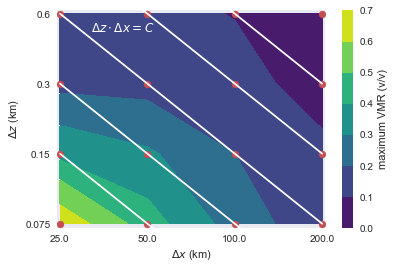

In [25]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

# switch to log scale
def log_switch(ax):
    ax.set_xscale('log')
    ax.set_yscale('log')

    # fix ticks
    ax.minorticks_off()
    ax.set_xticks(dx_list);ax.set_xticklabels(dx_list) # position, text
    ax.set_yticks(dz_list);ax.set_yticklabels(dz_list)

log_switch(ax)
    
# make filled-contour plot
im = ax.contourf(dx_list, dz_list, dr_end.values,
                 levels = np.linspace(0, 0.7, 8),
                 cmap='viridis')
ax.set_xlabel('$\Delta x$ (km)');ax.set_ylabel('$\Delta z$ (km)')
fig.colorbar(im,ax=ax).set_label('maximum VMR (v/v)')

# overlay data points
def add_data(ax):
    xxs, yys = np.meshgrid(dx_list,dz_list)
    ax.scatter(xxs, yys, color=palette[2])
    ax.set_xlim([24.5,205])
    ax.set_ylim([0.6/8*0.96, 0.62])
    #ax.set_ylim([0.6/16*0.96, 0.62]) # extrapolation

add_data(ax)
    
# overlay constraint lines
def add_constraint(order=[2,3]):
    
    if 3 in order:
        # computational constaint
        dxx = np.linspace(25,200)
        dzz = 0.3e6/dxx**3
        color = 'yellow'

        for level in [1/32, 1/4, 2]:
            plt.plot(dxx,level*dzz,c=color)
        plt.text(31,0.42,'$\Delta z \cdot \Delta x^3=C$',color=color)

    if 2 in order:
        # box number constaint
        dxx = np.linspace(25,200)
        dzz = 0.15e4/dxx**2
        color = 'w'

        for level in [1/16, 1/4, 1, 4]:
            plt.plot(dxx,level*dzz,c=color)
        plt.text(28,0.50,'$\Delta z \cdot \Delta x^2=C$',color=color)

    if 1 in order:
        # 2D box number constaint
        dxx = np.linspace(25,200)
        dzz = 30/dxx
        color = 'w'

        for level in [1/8,1/4, 1/2, 1, 2]:
            plt.plot(dxx,level*dzz,c=color)
        plt.text(32,0.50,'$\Delta z \cdot \Delta x=C$',color=color)

add_constraint(order=[1])
        
fig.savefig('VMR_contour_2D_constraint.png',dpi=200)
#fig.savefig('VMR_contour_3D_constraint.png',dpi=200)

### Entropy

In [19]:
import xarray as xr
maindir = "../small_output/"
dr_E = xr.open_dataarray(maindir+'plume01_entropy_all.nc',decode_times=False)
dr_E = dr_E.isel(time=-1)/dr_E.isel(time=0) # last day normalize by initial condition

In [20]:
dr_E

<xarray.DataArray (Hres: 4, Vres: 4)>
array([[ 20.172739,  19.482781,  19.252269,  19.242033],
       [ 19.358296,  17.900697,  17.251867,  17.098004],
       [ 18.398357,  16.489271,  15.217   ,  14.744221],
       [ 17.920005,  15.454721,  13.668386,  12.989346]])
Coordinates:
  * Vres     (Vres) int64 20 40 80 160
  * Hres     (Hres) int64 48 96 192 384

In [21]:
dr_E = np.clip(dr_E,13,20)

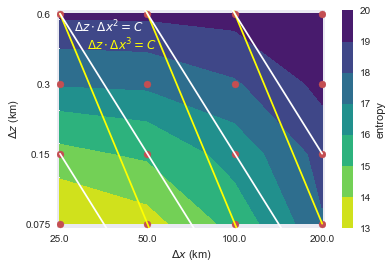

In [22]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

log_switch(ax)

im = ax.contourf(dx_list, dz_list, dr_E.values, cmap='viridis_r',
                 levels = np.linspace(13, 20, 8))
ax.set_xlabel('$\Delta x$ (km)');ax.set_ylabel('$\Delta z$ (km)')
fig.colorbar(im, ax=ax).set_label('entropy')

add_data(ax)
add_constraint()

fig.savefig('entropy_contour_3D_constraint.png',dpi=200)

## 3D

/Users/zhuangjw/Research/Computing/miniconda3/envs/geo/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


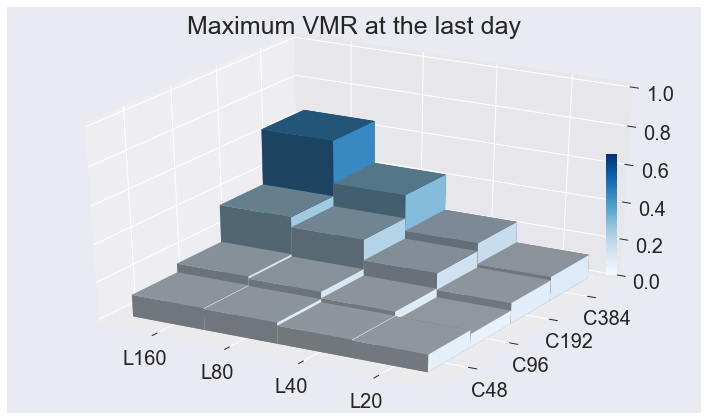

In [23]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
import matplotlib.colors as colors

fig, ax = plt.subplots(1,1,figsize=[10,6],subplot_kw=dict(projection='3d'))

testdata = ds_end['plume01'].values

# Make data.

# fake data
_x = np.arange(4,0,-1)
_y = np.arange(4)
_xx, _yy = np.meshgrid(_x, _y)
x, y = _xx.ravel(), _yy.ravel()

top = testdata.ravel()
bottom = np.zeros_like(top)
width = depth = 1

fracs = top
#norm = colors.Normalize(fracs.min(), fracs.max())
norm = colors.Normalize(0, 1)
cmap = cm.Blues(norm(fracs))
#cmap[:,3] = 0.8 #alpha

ax.bar3d(x, y, bottom, width, depth, top, color=cmap, alpha=0.2)

ax.set_zlim([0,1])
ax.set_title('Maximum VMR at the last day', fontsize=25)
ax.set_xticks(_x+0.5); ax.set_xticklabels(Vlabels, fontsize=20)
ax.set_yticks(_y+0.5); ax.set_yticklabels(Hlabels, fontsize=20)
ax.set_zticks(np.arange(0,1.1,0.2)); ax.set_zticklabels(np.arange(0,1.1,0.2), fontsize=20)

ax1 = fig.add_axes([0.85, 0.35, 0.015, 0.28])
cb1 = mpl.colorbar.ColorbarBase(ax1, cmap= cm.Blues,
                                norm=colors.Normalize(0,0.6),
                                orientation='vertical')
#cb1.set_label('Maximum VMR, v/v',fontsize=16)
cb1.set_ticks([])


plt.tight_layout()
#fig.savefig('plume01_lastdayVMR.png',dpi=200)

# Plume size effect

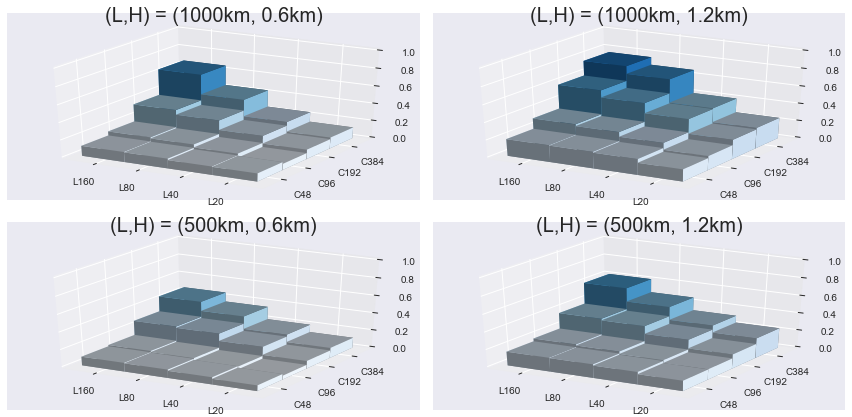

In [24]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
import matplotlib.colors as colors

fig, axes = plt.subplots(2,2,figsize=[12,6],subplot_kw=dict(projection='3d'))

for k,var in enumerate(var_list):

    ax = axes.flatten()[k]
    testdata = ds_end[var].values
    
    # Make data.

    # fake data
    _x = np.arange(4,0,-1)
    _y = np.arange(4)
    _xx, _yy = np.meshgrid(_x, _y)
    x, y = _xx.ravel(), _yy.ravel()

    top = testdata.ravel()
    bottom = np.zeros_like(top)
    width = depth = 1

    fracs = top
    #norm = colors.Normalize(fracs.min(), fracs.max())
    norm = colors.Normalize(0, 1)
    cmap = cm.Blues(norm(fracs))
    #cmap[:,3] = 0.8 #alpha
    
    ax.bar3d(x, y, bottom, width, depth, top, color=cmap, alpha=0.2)

    ax.set_zlim([0,1])
    ax.set_title('(L,H) = '+size_list[k], fontsize=20)
    ax.set_xticks(_x+0.5); ax.set_xticklabels(Vlabels)
    ax.set_yticks(_y+0.5); ax.set_yticklabels(Hlabels)
    
plt.tight_layout()
#fig.savefig('plume_size_effect.png',dpi=200)